# Zomato Data Set Analysis and Visualization

### Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [37]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


### Reading CSV

In [2]:
df=pd.read_csv("zomatoaug3.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#Finding the rows and columns
df.shape

(51717, 17)

In [4]:
#Getting all column names
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
#Dropping/Deleting unwanted columns
df=df.drop(['url','address','phone','menu_item','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


### Dropping Duplicates

In [39]:
#finding duplicate values
df.duplicated().sum()

6475

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   dish_liked                   23595 non-null  object
 8   cuisines                     51564 non-null  object
 9   approx_cost(for two people)  51265 non-null  object
 10  listed_in(type)              51609 non-null  object
 11  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.1+ MB


### Cleaning Rate Column

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
value='2.0/5'
x=value.split("/")
x[0]
#example showing how to split the value 

'2.0'

#### Removing "New","-" and "/5" from Rate Column

In [12]:
def handlerate(value):
    if(value=='NEW'or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
df.info()
#to find the data type of the updated rate column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   dish_liked                   23595 non-null  object 
 8   cuisines                     51564 non-null  object 
 9   approx_cost(for two people)  51265 non-null  object 
 10  listed_in(type)              51609 non-null  object 
 11  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


#### Finding Null Value

In [14]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                           10019
votes                              0
location                          21
rest_type                        227
dish_liked                     28014
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
(df.isna().sum()/df.shape[0])*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.413281
votes                           0.000000
location                        0.040691
rest_type                       0.439846
dish_liked                     54.281230
cuisines                        0.087194
approx_cost(for two people)     0.666550
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Filling Null Values in Rate coulmn with Mean

In [16]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [40]:
df['rate'].isnull().sum()

0

# Dropping Null Values

In [18]:
df.dropna(inplace=True)


In [19]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [20]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [22]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# listed in (city) and location, both are there lets keep only one 

In [23]:
df=df.drop(['listed_in(city)'],axis=1)

In [24]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

# Removing comma( ',') from Cost2Plates Column

In [25]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
df['Cost2plates']=df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [26]:
df.info()
#No need to get info in all the analysis 
# this is just for understanding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23393 entries, 0 to 51715
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23393 non-null  object 
 1   online_order  23393 non-null  object 
 2   book_table    23393 non-null  object 
 3   rate          23393 non-null  float64
 4   votes         23393 non-null  int64  
 5   location      23393 non-null  object 
 6   rest_type     23393 non-null  object 
 7   dish_liked    23393 non-null  object 
 8   cuisines      23393 non-null  object 
 9   Cost2plates   23393 non-null  float64
 10  Type          23393 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.1+ MB


In [27]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23393 entries, 0 to 51715
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23393 non-null  object 
 1   online_order  23393 non-null  object 
 2   book_table    23393 non-null  object 
 3   rate          23393 non-null  float64
 4   votes         23393 non-null  int64  
 5   location      23393 non-null  object 
 6   rest_type     23393 non-null  object 
 7   dish_liked    23393 non-null  object 
 8   cuisines      23393 non-null  object 
 9   Cost2plates   23393 non-null  float64
 10  Type          23393 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.1+ MB


# cleaning rest type column

In [29]:
rest_types=df['rest_type'].value_counts(ascending =False)
rest_types

Casual Dining                7387
Quick Bites                  5267
Cafe                         2380
Dessert Parlor               1083
Casual Dining, Bar            986
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [30]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Casual Dining, Bar           986
Delivery                     707
Bar                          358
Bar, Casual Dining           347
Takeaway, Delivery           343
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: rest_type, Length: 69, dtype: int64

# making rest types less than 1000 in frequency as others
# Other vice 9000 record distinct values are comeing 

In [31]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

In [32]:
# function 
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Casual Dining     7387
others            7276
Quick Bites       5267
Cafe              2380
Dessert Parlor    1083
Name: rest_type, dtype: int64

# cleaning location column 

In [33]:
location=df['location'].value_counts(ascending=False)
location_lessthan300 =location[location<300]


def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

others                   3730
Koramangala 5th Block    1799
BTM                      1486
Indiranagar              1365
HSR                      1176
Jayanagar                1077
JP Nagar                 1029
Whitefield                835
Koramangala 7th Block     742
Koramangala 6th Block     726
Marathahalli              680
Koramangala 4th Block     664
MG Road                   601
Brigade Road              567
Church Street             509
Bannerghatta Road         499
Ulsoor                    476
Bellandur                 474
Kalyan Nagar              468
Koramangala 1st Block     467
Sarjapur Road             455
Lavelle Road              441
Residency Road            439
Banashankari              390
Malleshwaram              372
Richmond Road             351
Cunningham Road           332
Electronic City           326
Brookefield               307
New BEL Road              306
St. Marks Road            304
Name: location, dtype: int64

In [34]:
#cleaning cuisines columns
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

In [44]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]


def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                              17661
North Indian                                         1160
North Indian, Chinese                                 778
South Indian                                          367
Cafe                                                  285
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      217
Desserts, Beverages                                   216
Ice Cream, Desserts                                   211
Chinese                                               210
Desserts                                              209
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North Indian, 

# data is clean lets jump to visualization 

# count plot of various locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'Bannerghatta Road'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'Koramangala 5th Block'),
  Text(7, 0, 'Richmond Road'),
  Text(8, 0, 'Bellandur'),
  Text(9, 0, 'Sarjapur Road'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'HSR'),
  Text(12, 0, 'Indiranagar'),
  Text(13, 0, 'Koramangala 1st Block'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Lavelle Road'),
  Text(17, 0, 'Church Street'),
  Text(18, 0, 'Ulsoor'),
  Text(19, 0, 'Residency Road'),
  Text(20, 0, 'St. Marks Road'),
  Text(21, 0, 'Cunningham Road'),
  Text(22, 0, 'Koramangala 6th Block'),
  Text(23, 0, 'Koramangala 7th Block'),
  Text(24, 0, 'Brookefield'),
  Text(25, 0, 'Whitefield'),
  Text(26, 0, 'Koramangala 4th Block'),
  Text(27, 0, 'Elect

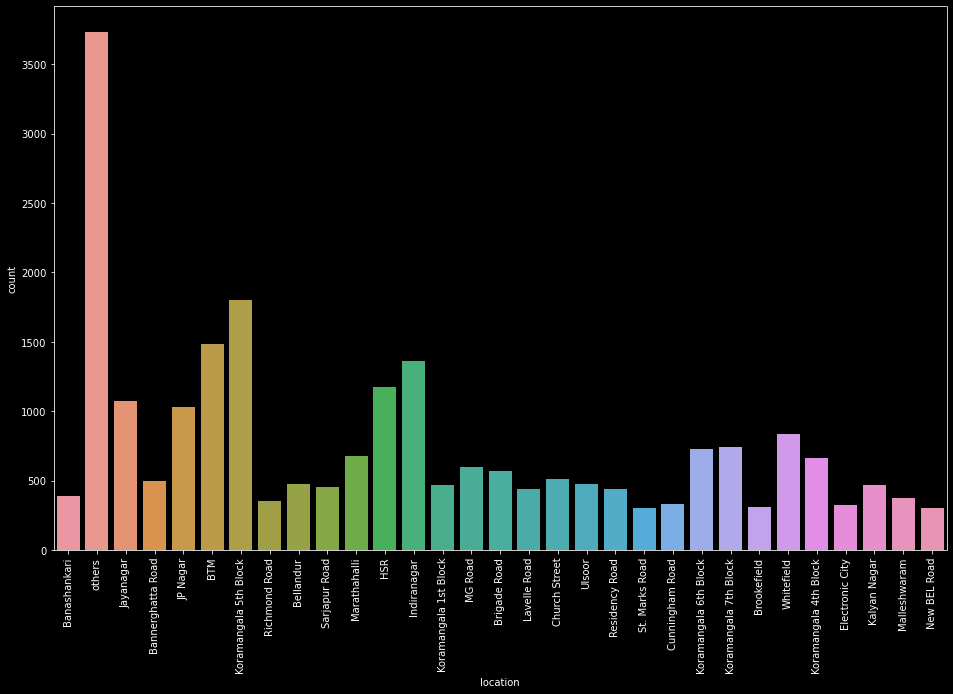

In [45]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df['location'])
plt.xticks(rotation=90)

# visualizing online order 

<AxesSubplot:xlabel='online_order', ylabel='count'>

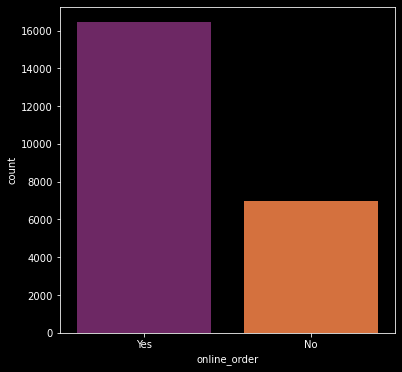

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'],palette='inferno') #color code is refers to palette 

# visualizing book table 

<AxesSubplot:xlabel='book_table', ylabel='count'>

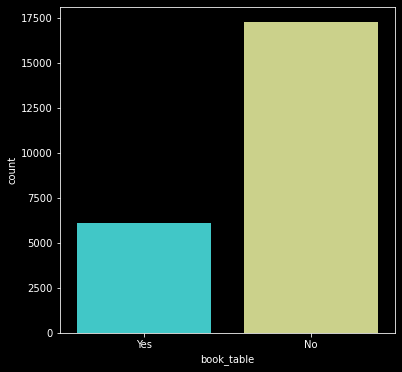

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(df['book_table'],palette='rainbow')

# visualizing online order vs rate

<AxesSubplot:xlabel='online_order', ylabel='rate'>

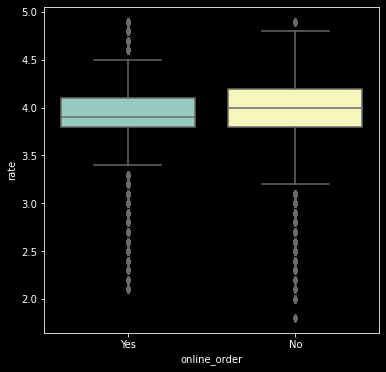

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

# visualizing book  table vs rate

<AxesSubplot:xlabel='book_table', ylabel='rate'>

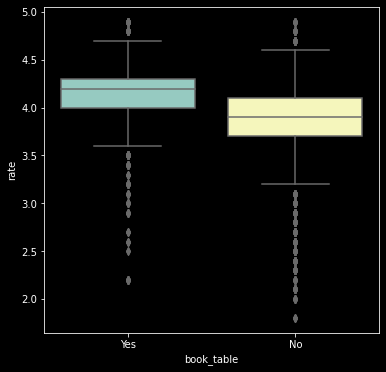

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

# visualizing online order facility ,location wise

In [51]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1



name      
online_order             No   Yes
location                         
BTM                     274  1212
Banashankari            103   287
Bannerghatta Road       114   385
Bellandur               118   356
Brigade Road            224   343
Brookefield              61   246
Church Street           195   314
Cunningham Road          62   270
Electronic City          98   228
HSR                     161  1015
Indiranagar             403   962
JP Nagar                315   714
Jayanagar               220   857
Kalyan Nagar            127   341
Koramangala 1st Block    57   410
Koramangala 4th Block   262   402
Koramangala 5th Block   564  1235
Koramangala 6th Block   239   487
Koramangala 7th Block   216   526
Lavelle Road            253   188
MG Road                 327   274
Malleshwaram            132   240
Marathahalli            161   519
New BEL Road             64   242
Residency Road          265   174
Richmond Road           202   149
Sarjapur Road           108   347
St. Marks Road          137   167
Ulsoor                  170   306
Whitefield              267   568
others                 1058  2672

<AxesSubplot:xlabel='location'>

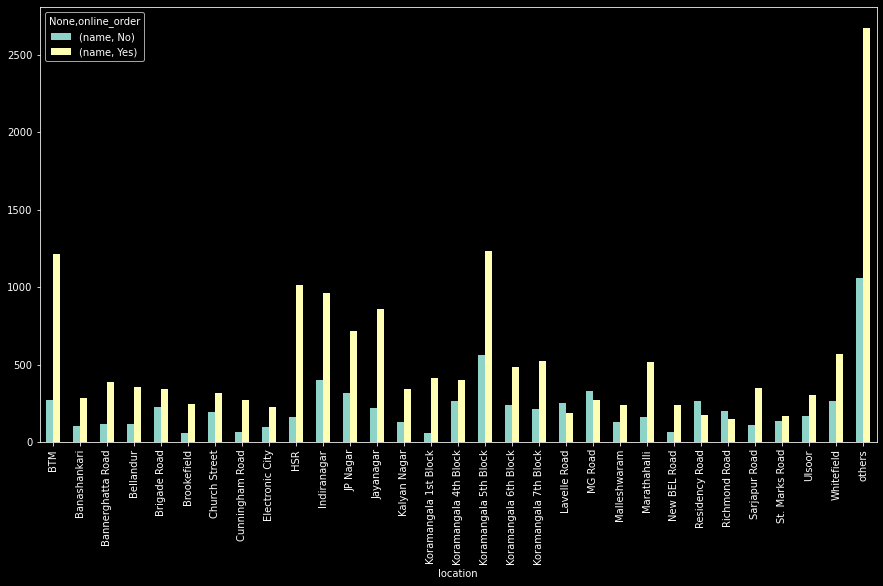

In [52]:
df1.plot(kind = 'bar', figsize = (15,8))


# visualizing online order location,book_table  wise

<AxesSubplot:xlabel='Type', ylabel='rate'>

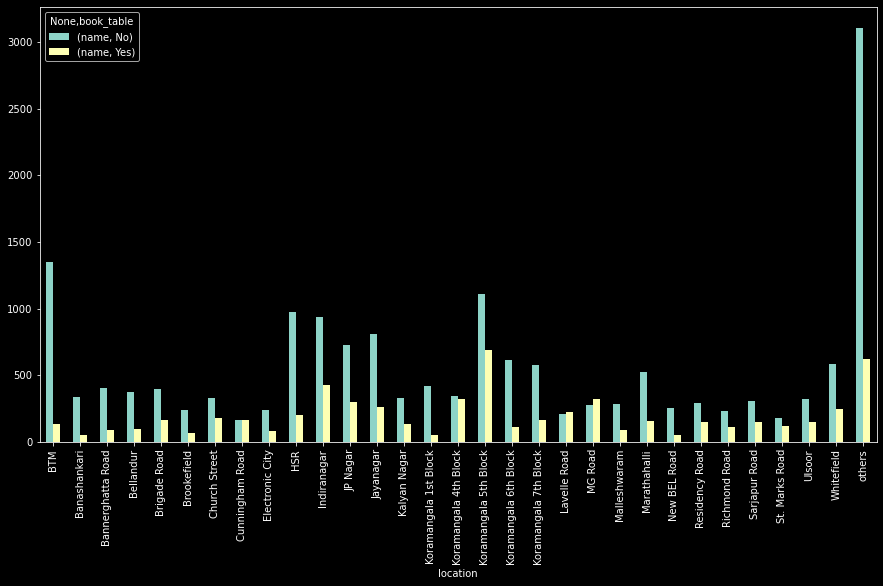

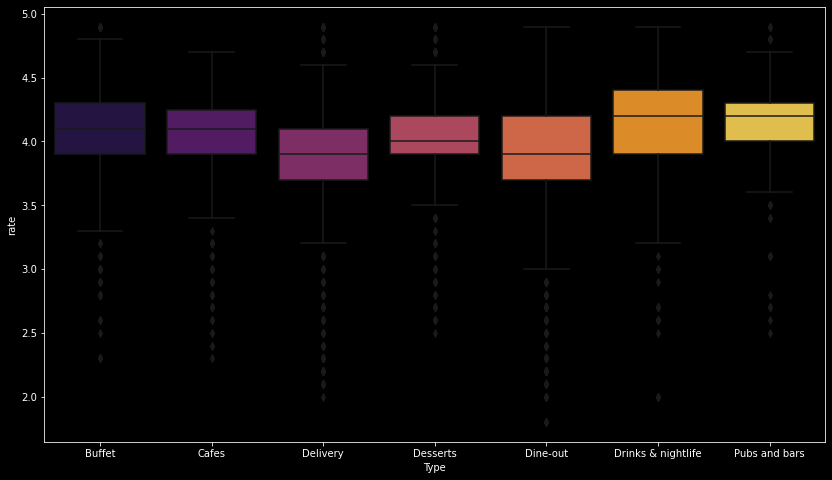

In [53]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2
df2.plot(kind = 'bar', figsize = (15,8))
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')


# ploting location','Type

In [54]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    36      902       54      461   
Banashankari               7    24      191       19      141   
Bannerghatta Road          8    19      252       28      182   
Bellandur                 26    11      217       26      167   
Brigade Road              20    20      200       42      213   
Brookefield                6    15      150       14      118   
Church Street             19    41      176       25      197   
Cunningham Road           23    23      144       17      110   
Electronic City           17    11      125       15      134   
HSR                       17    36      765       55      275   
Indiranagar               36    84      678       91      358   
JP Nagar                  34    51      470       63      360   
Jayanagar                 25    57      586       75      322   
Kalyan Nagar               9    27      193       33      188   
Koramangala 1st Block      3    18      269       17      148   
Koramangala 4th Block     16    44      267       41      216   
Koramangala 5th Block     65   124      715      157      601   
Koramangala 6th Block     18    36      313       44      261   
Koramangala 7th Block     25    32      280       73      291   
Lavelle Road              30    22       99       29      176   
MG Road                   44    43      143       29      258   
Malleshwaram              11    16      119       27      165   
Marathahalli              27     8      354       18      250   
New BEL Road               4    20      159       14       94   
Residency Road            20    20      110       42      190   
Richmond Road             54    10       86       25      164   
Sarjapur Road             25    11      208       25      146   
St. Marks Road             5    10      101       10      120   
Ulsoor                    16    43      169       27      184   
Whitefield                21    28      366       41      321   
others                   112   127     1887      191     1271   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9             6  
Banashankari                           8             0  
Bannerghatta Road                      8             2  
Bellandur                             15            12  
Brigade Road                          52            20  
Brookefield                            4             0  
Church Street                         31            20  
Cunningham Road                       11             4  
Electronic City                       12            12  
HSR                                   13            15  
Indiranagar                           60            58  
JP Nagar                              45             6  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Koramangala 1st Block                  7             5  
Koramangala 4th Block                 52            28  
Koramangala 5th Block                 84            53  
Koramangala 6th Block                 39            15  
Koramangala 7th Block                 20            21  
Lavelle Road                          54            31  
MG Road                               52            32  
Malleshwaram                          20            14  
Marathahalli                          21             2  
New BEL Road                           7             8  
Residency Road                        40            17  
Richmond Road                          6             6  
Sarjapur Road                         19            21  
St. Marks Road                        36            22  
Ulsoor                                19      

<AxesSubplot:xlabel='location'>

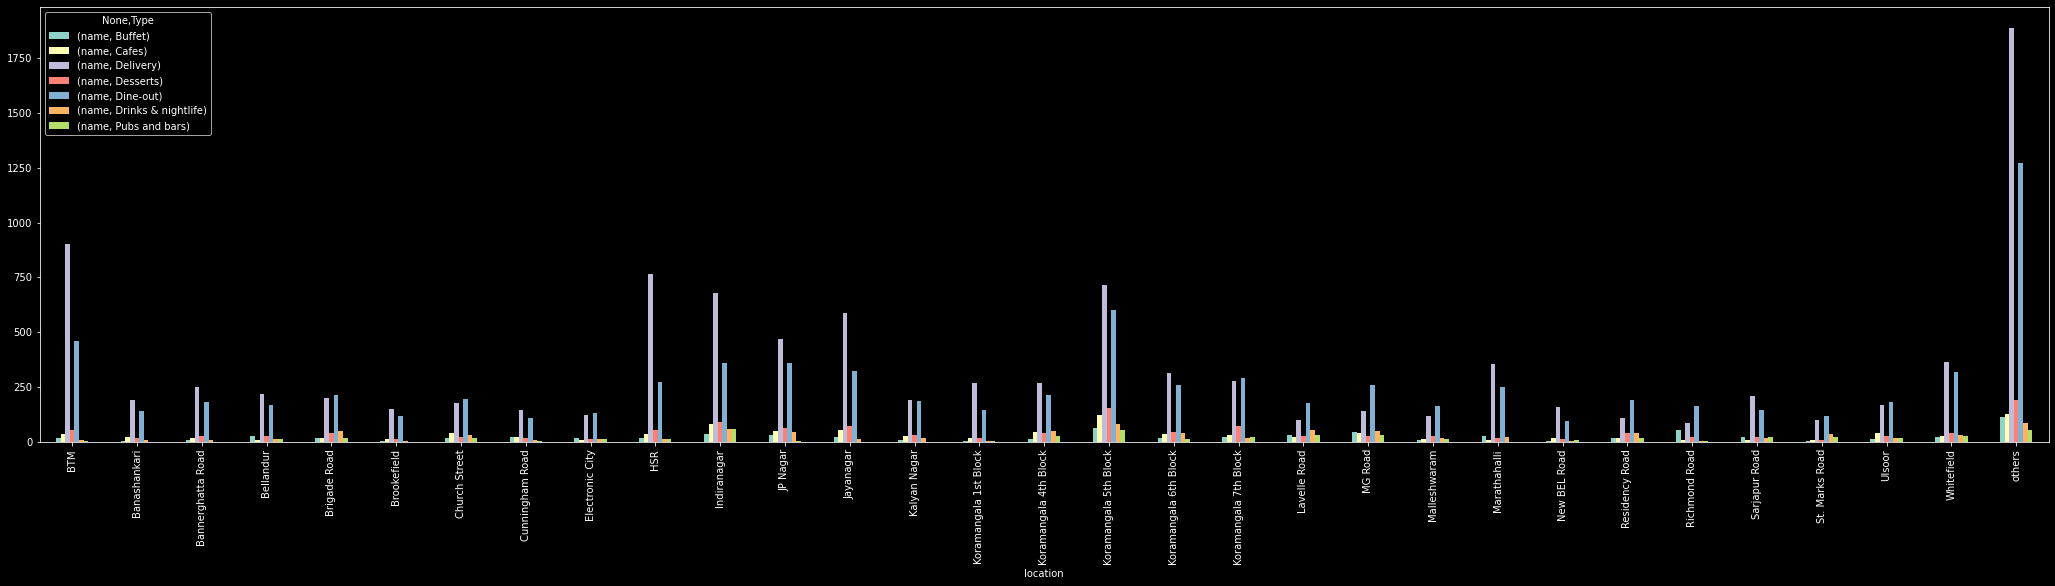

In [55]:
df3.plot(kind = 'bar', figsize = (36,8))


# visualization 'location', 'votes'

In [57]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2203218
others,1212757
Indiranagar,1155387
Koramangala 4th Block,680907
Church Street,589803


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Whitefield'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Marathahalli'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Kalyan Nagar'),
  Text(27, 0, 'Banas

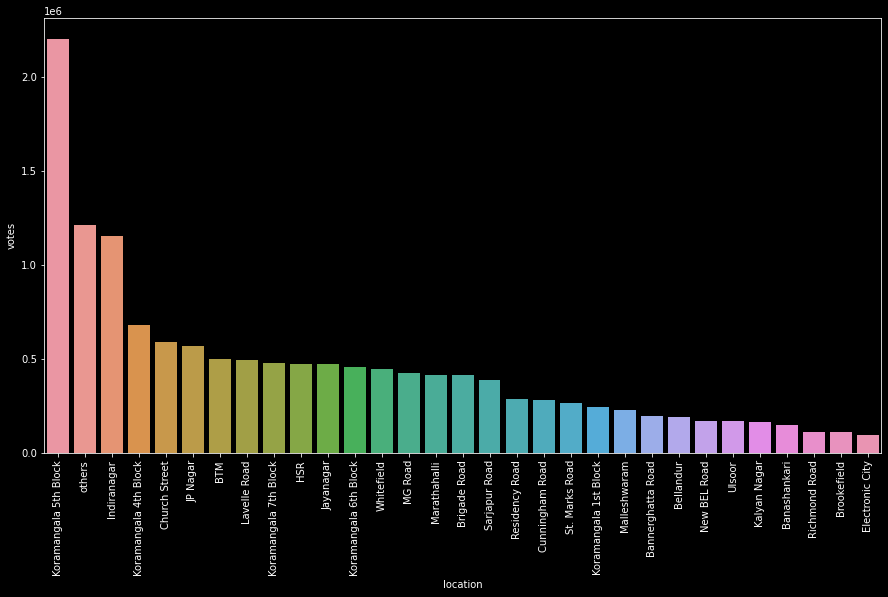

In [58]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['votes'])
plt.xticks(rotation = 90)


# visualization 'cuisines', 'votes'

In [60]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()


,votes
cuisines,
others,12111844
North Indian,494635
"North Indian, Chinese",222514
South Indian,144467
"North Indian, Mughlai",102581


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'North Indian'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'South Indian'),
  Text(4, 0, 'North Indian, Mughlai'),
  Text(5, 0, 'Chinese'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'Chinese, Momos'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Cafe, Continental'),
  Text(10, 0, 'Ice Cream, Desserts'),
  Text(11, 0, 'Desserts, Beverages'),
  Text(12, 0, 'South Indian, North Indian, Chinese'),
  Text(13, 0, 'Finger Food'),
  Text(14, 0, 'Burger, Fast Food'),
  Text(15, 0, 'Cafe, Desserts'),
  Text(16, 0, 'Biryani'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Pizza, Fast Food'),
  Text(19, 0, 'Chinese, Thai'),
  Text(20, 0, 'South Indian, North Indian, Chinese, Street Food'),
  Text(21, 0, 'North Indian, Chinese, Biryani'),
  Text(22, 0, 'Mithai, Street Food'),
  Text(23, 0, 'Desserts, Ice Cream'),
  Text(24, 0, 'Fast Food')])

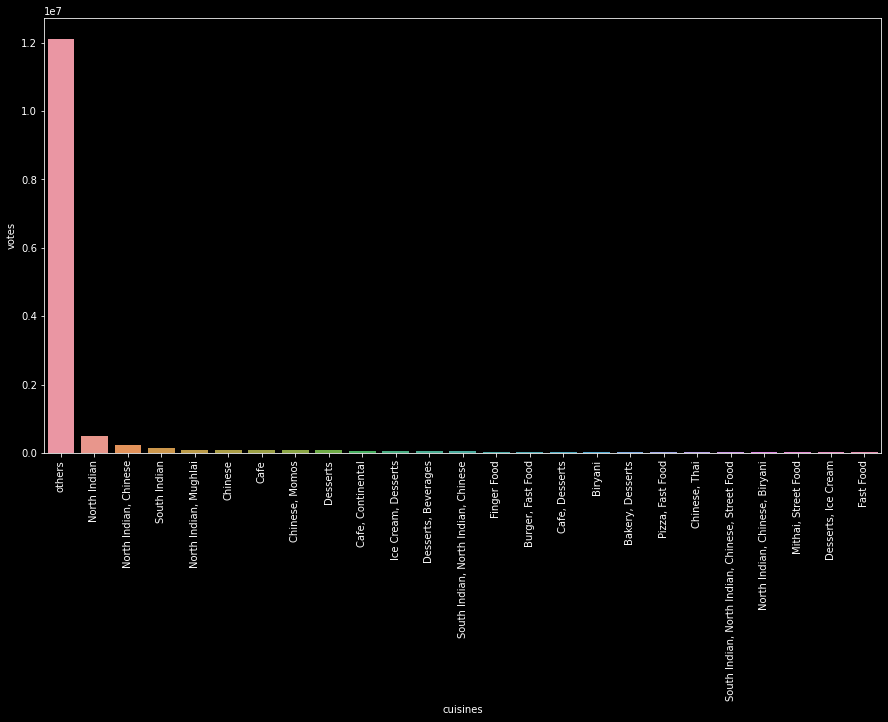

In [61]:
plt.figure(figsize = (15,8))
sns.barplot(df7.index , df7['votes'])
plt.xticks(rotation = 90)
